In [16]:
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict
%matplotlib inline

#local imports
from detection_rate_main import detection_rate_main
from utils.mbhbinaries import  mass_ratio_func, ConstantTime
from utils.evolveFDFA import EvolveFDFA
from utils.basicmergers import MagicMergers

from pyphenomd.pyphenomd import *
from pyphenomd.read_noise_curves import read_noise_curve
import scipy.constants as ct
Msun=1.989e30

## Declare Resample Parameters

In [13]:
num_catalogs = 1000
t_obs = 10.0 #years
duration = 100.0 #years

#input file
fp = 'simulation_input_data.txt'

##################
###### KDE #######
##################

# what key for the input data for m1, m2. It is not
# needed for z because we calculate z_coalescence. 
kde_key_guide = OrderedDict()
kde_key_guide['m1'] = 'mass_new_prev_in'
kde_key_guide['m2'] = 'mass_new_prev_out'
#kde_key_guide['z'] = 'redshift'

########################
###### Evolution #######
########################

# evolve with Dosopoulou and Antonini 2017
evolve_class = EvolveFDFA
# keys are the parameter names for the evolution scenario. 
# values are the corresponding names of the input_data columns
evolve_key_guide = {'m1':'mass_new_prev_in', 'm2':'mass_new_prev_out', 
                    'z':'redshift', 'separation':'separation', 'gamma':'gamma', 
                    'vel_disp_1':'vel_disp_prev_in',  'vel_disp_2':'vel_disp_prev_out'}


# magic mergers
#evolve_key_guide = {'z':'redshift'}
#evolve_class = MagicMergers

###########################
###### merger rate  #######
###########################

# kwargs related to merger rate calculation
merger_rate_kwargs = {'Vc':106.5**3, 'dz':0.001, 'zmax':10.0}

############################################
###### Parrallel Calculation of SNRs #######
############################################
parallel_kwargs = {'num_processors':None, 'num_splits':1000, 'verbose':50}

## Run the Resampler

In [3]:
# only_detectable and snr_threshold are optional kwargs.
# only_detectable defaults to False which makes snr_threshold meaningless
# only_detectable True means the binaries returned have an SNR over the threshold
cats = detection_rate_main(num_catalogs, t_obs, duration, fp,
                            evolve_key_guide, kde_key_guide, evolve_class,
                            merger_rate_kwargs, parallel_kwargs, 
                            only_detectable=True, snr_threshold=8.0)

merger rate: 0.6194962953593661
numprocs 4
start pool with 4 processors: 7 total processes.

SNR calculation time: 1.698451042175293
Total Duration: 28.542667150497437


/Users/michaelkatz/Documents/Research/Illustris/MCproject/paper/code/detection_rate_main.py:79: RuntimeWarning: invalid value encountered in greater
  inds_keep = np.where(snr>8.0)[0]


In [22]:
cats.dtype

dtype((numpy.record, [('cat', '<i8'), ('t_event', '<f8'), ('m1', '<f8'), ('m2', '<f8'), ('z_coal', '<f8'), ('snr', '<f8')]))

In [15]:
snr_bins = np.logspace(np.log10(8.0), 5.0, 31)
detection_bins = np.linspace(0.0, 5.0, 31)


fig, ax = plt.subplots(1,2)
ax = ax.ravel()

evolution_classes = [[EvolveFDFA, {'m1':'mass_new_prev_in', 'm2':'mass_new_prev_out', 
                    'z':'redshift', 'separation':'separation', 'gamma':'gamma', 
                    'vel_disp_1':'vel_disp_prev_in',  'vel_disp_2':'vel_disp_prev_out'}, 'FDFA'], 
                     [ConstantTime, {'z':'redshift'}, 'Constant']]

for evolve_class, evolve_dict, label in evolution_classes:
    cats = detection_rate_main(num_catalogs, t_obs, duration, fp,
                            evolve_dict, kde_key_guide, evolve_class,
                            merger_rate_kwargs, parallel_kwargs, 
                            only_detectable=True, snr_threshold=8.0)

    #detection count histogram
    #if we use kwarg only_detectable, we do not have to filter the dataset
    #as it already represents only detections
    uni_vals, uni_counts = np.unique(cats['cat'], return_counts=True)

    per_year_counts = uni_counts/t_obs
    ax[0].hist(per_year_counts, bins=detection_bins, label=label, histtype='step', lw=3, log=True, density=True)
    print(per_year_counts.min())
    #SNR histogram
    print(cats['snr'].min())
    ax[1].hist(np.log10(cats['snr']), bins=snr_bins,label=label, histtype='step', lw=3, log=True, density=True)
    ax[1].set_xlim(np.log10(8),)
    ax[1].set_xlabel(r'$\log_{10}{\rho}$')

merger rate: 0.6194962953593661
numprocs 4
start pool with 4 processors: 63 total processes.

Start process: 49
SNR calculation time: 13.079158067703247
Total Duration: 40.626161098480225
0.1
8.046213237413578


/Users/michaelkatz/Documents/Research/Illustris/MCproject/paper/code/detection_rate_main.py:79: RuntimeWarning: invalid value encountered in greater
  inds_keep = np.where(snr>8.0)[0]
/Users/michaelkatz/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/Users/michaelkatz/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6642: RuntimeWarning: invalid value encountered in greater
  minimum = (np.min(ndata[ndata > 0])) / logbase


ValueError: zero-size array to reduction operation minimum which has no identity

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x10f5036a8> (for post_execute):


ValueError: Data has no positive values, and therefore can not be log-scaled.

ValueError: Data has no positive values, and therefore can not be log-scaled.

<Figure size 432x288 with 2 Axes>

[2.68377761e-06 2.68661435e-06 2.68945408e-06 ... 2.02596930e-04
 2.02811073e-04 2.03025444e-04] [2.68334481e-06 7.13139255e-06 2.90075465e-05 1.18729624e-04]
[9.40103957e-06 9.40809589e-06 9.41515751e-06 ... 2.02721009e-04
 2.02873169e-04 2.03025444e-04] [9.39954595e-06 2.57253610e-05 1.12105829e-04 5.04826268e-04]


Text(0.5,0.05,'Frequency (Hz)')

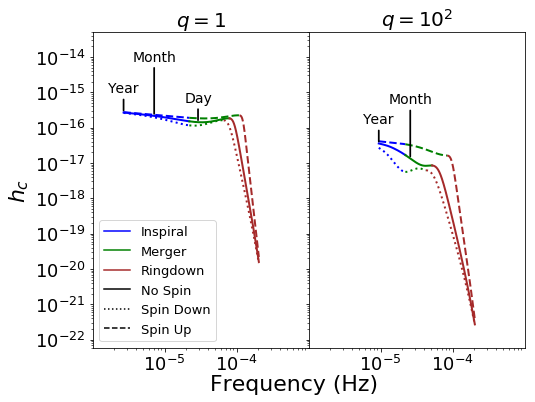

In [5]:
fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
fig1.set_size_inches(8,6)
plt.subplots_adjust(wspace=0.0, left=0.15, bottom=0.15)

M = 1e8
z = 1.0
start_time = 1.0
end_time = 0.0
ax1.set_title(r'$q=1$', fontsize=20)
ax2.set_title(r'$q=10^{2}$', fontsize=20)
for q, ax in [[1, ax1], [1/100,ax2]]:
    ax.set_ylim(6e-23, 5e-14)
    ax.set_xlim(1e-6, 1e-3)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
    
    for s, ls in [[-0.8, 'dotted'], [0.0, 'solid'], [0.8,'dashed']]:
        m1 = M/(1+q)
        m2 = M*q/(1+q)
        wave = PhenomDWaveforms(m1, m2, s, s, z, start_time, end_time, num_points=4096)
        wave.create_waveforms()
        
        f = wave.freqs
        hc = wave.amplitude*np.sqrt(96/200) #averaging factor see Cornish and Robson 2018
        
        ins = np.where(f<wave.fmrg)[0]
        mrg = np.where((f>=wave.fmrg)&(f<=wave.fpeak))[0]
        rd = np.where(f>wave.fpeak)[0]
        
        ax.loglog(f[ins], hc[ins], color='blue', ls = ls, lw = 2)
        ax.loglog(f[mrg], hc[mrg], color='green', ls = ls, lw = 2)
        ax.loglog(f[rd], hc[rd], color='brown', ls = ls, lw = 2)
        if s == 0.0:
            N = m1*m2/(m1+m2)**2.
            start_times = np.array([1.0,1.0/12.0, 1.0/365.25,1.0/(365.25*24.0)])*ct.Julian_year/(1+z)

            tau = N*(start_times*ct.c)/(5.*(m1+m2)*Msun*ct.G/(ct.c**2.))
            flow = 1./(8.*ct.pi*(m1+m2)*Msun*ct.G/(ct.c**2.)*tau**(3./8.))*(1.+((11./32)*N+743./2688.)*tau**(-1./4.))*ct.c/(1+z)

            print(f, flow)
            try:
                f_1y_ind = np.where(f >= flow[0])[0][0]
            except IndexError:
                f_1y_ind = 0
            ax.annotate("Year",xy=(f[f_1y_ind], hc[f_1y_ind]), xycoords='data',xytext=(0, 20), ha='center', textcoords='offset points',arrowprops=dict(arrowstyle="-",linewidth = 1.75), fontsize=14)  
            
            f_1m_ind = np.where(f >= flow[1])[0][0]
            ax.annotate("Month",xy=(f[f_1m_ind], hc[f_1m_ind]), xycoords='data',xytext=(0.0, 55), ha='center', textcoords='offset points',arrowprops=dict(arrowstyle="-",linewidth = 1.75), fontsize=14)
            
            if q != 1/100:
                f_1d_ind = np.where(f >= flow[2])[0][0]
                ax.annotate("Day",xy=(f[f_1d_ind], hc[f_1d_ind]), xycoords='data',xytext=(0.0, 20), ha='center', textcoords='offset points',arrowprops=dict(arrowstyle="-",linewidth = 1.75), fontsize=14)

ax1.plot(1,1, color='blue', ls='solid', label='Inspiral')
ax1.plot(1,1, color='green', ls='solid', label='Merger')
ax1.plot(1,1, color='brown', ls='solid', label='Ringdown')
ax1.plot(1,1, color='black', ls='solid', label='No Spin')
ax1.plot(1,1, color='black', ls='dotted', label='Spin Down')
ax1.plot(1,1, color='black', ls='dashed', label='Spin Up')
ax1.legend(loc='lower left', prop={'size':13})
ax1.set_ylabel(r'$h_c$', fontsize = 22)
ax1.set_xticks([1e-5, 1e-4])

fig1.text(0.5, 0.05, 'Frequency (Hz)', ha = 'center', fontsize=22)
#fig1.savefig('figures/Phase_tracks1.pdf', dpi=250)

In [3]:
read_noise_curve

<function pyphenomd.read_noise_curves.read_noise_curve(noise_curve, wd_noise=False, noise_type='ASD')>

## Sensitivity Curves Used

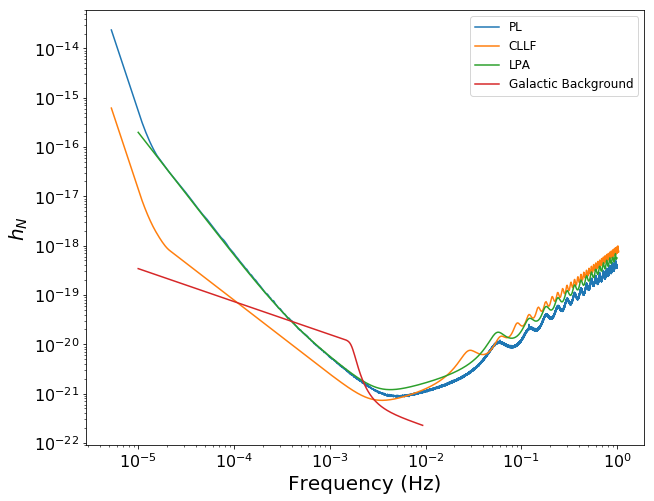

In [25]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,8)

for nc in ['PL', 'CLLF', 'LPA', 'WDnoise']:
    fn, hn = read_noise_curve(nc, noise_type='characteristic_strain')
    if nc == 'WDnoise':
        nc = 'Galactic Background'
    ax.loglog(fn, hn, label=nc)
    
ax.tick_params(labelsize=16)
ax.set_xlabel('Frequency (Hz)', fontsize=20)
ax.set_ylabel(r'$h_N$', fontsize=20)
ax.legend(prop={'size':12})
fig.savefig('figures/sensitivity_curves.pdf', dpi=250)

## Initial Histograms

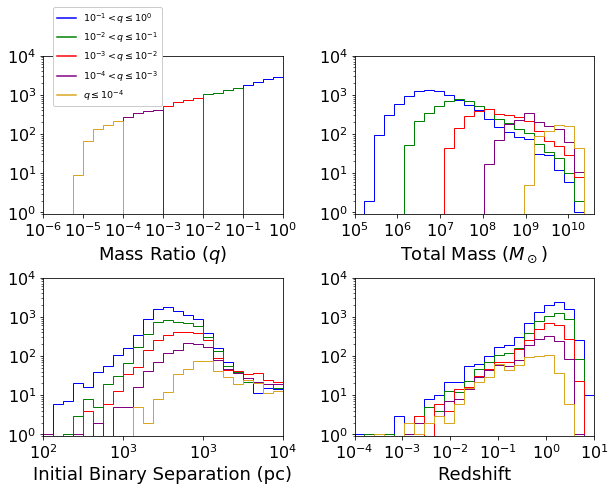

In [4]:
data = np.genfromtxt('simulation_input_data.txt', names=True)

m1 = data['mass_new_prev_in']
m2 = data['mass_new_prev_out']

separation = data['separation']*1e3

redshift = data['redshift']

total_mass = m1+m2

q = mass_ratio_func(m1, m2)

inds_set = []
for i in np.arange(1,5):
    inds_set.append(np.where((q<=10.0**-(i-1)) & (q>10.0**-(i)))[0])

inds_set.append(np.where((q<10.0**-(4)))[0])

total_num = len(total_mass)

fig, ax = plt.subplots(nrows=2, ncols=2)
ax = ax.ravel()
fig.set_size_inches(9,7)
xlims = [[-6,0],[5,10.6],[2.5,4],[-4.0,1.0]]
colors = ['blue', 'green', 'red', 'purple', 'goldenrod']

w = 0
for parameter in [q, total_mass, separation, redshift]:
    ww = 0
    for inds in inds_set:
        #weights = np.ones_like(parameter[inds])/float(len(parameter))
        #ax[w].hist(np.log10(parameter[inds]), bins=num_bins[w], histtype = 'step', weights=weights, log=True)

        bins = np.linspace(xlims[w][0], xlims[w][1], 25)
        try:
            ax[w].hist(np.log10(parameter[inds]), bins=bins, histtype = 'step', log=True, color = colors[ww])
        except IndexError:
            pdb.set_trace()
        ww+=1
        
    ax[w].set_ylim(9e-1, 1e4)
    ax[w].set_xlim(xlims[w])


    w+=1

#legend

ax[0].plot([-100,-100], [-220, 200], color = colors[0], label = r'$10^{-1}<q\leq 10^0$')
ax[0].plot([-100,-100], [-220, 200], color = colors[1], label = r'$10^{-2}<q\leq 10^{-1}$')
ax[0].plot([-100,-100], [-220, 200], color = colors[2], label = r'$10^{-3}<q\leq 10^{-2}$')
ax[0].plot([-100,-100], [-220, 200], color = colors[3], label = r'$10^{-4}< q\leq 10^{-3}$')
ax[0].plot([-100,-100], [-220, 200], color = colors[4], label = r'$q\leq 10^{-4}$')

xtickfontsize = 16
xlabelfontsize = 18

#ax[0].legend(bbox_to_anchor=(3.0, 0.05), prop={'size':11})
legend = ax[0].legend(bbox_to_anchor=[0.02, 0.65], prop={'size':9.5}, ncol=1, fancybox=True, framealpha=1.0)
#labels
ax[0].set_xlabel(r'Mass Ratio ($q$)', fontsize=xlabelfontsize)
ax0_xticks = [-6.0,-5.0, -4.0, -3.0, -2.0, -1.0, 0.0]
ax[0].set_xticks(ax0_xticks)
ax[0].set_xticklabels([r'$10^{%i}$'%int(i) for i in ax0_xticks], fontsize=xtickfontsize)

ax[1].set_xlabel(r'Total Mass ($M_\odot$)', fontsize=xlabelfontsize)
ax1_xticks = [5.0, 6.0,7.0, 8.0, 9.0, 10.0]
ax[1].set_xticks(ax1_xticks)
ax[1].set_xticklabels([r'$10^{%i}$'%int(i) for i in ax1_xticks], fontsize=xtickfontsize)

ax[2].set_xlabel('Initial Binary Separation (pc)', fontsize=xlabelfontsize)
ax2_xticks = [2.5, 3.0,3.5, 4.0]
ax[2].set_xticks(ax2_xticks)
ax[2].set_xticklabels([r'$10^{%.1g}$'%int(i) for i in ax2_xticks], fontsize=xtickfontsize)

ax[3].set_xlabel('Redshift', fontsize=xlabelfontsize)
ax3_xticks = [-4.0, -3.0, -2.0, -1.0, 0.0, 1.0]
ax[3].set_xticks(ax3_xticks)
ax[3].set_xticklabels([r'$10^{%i}$'%int(i) for i in ax3_xticks], fontsize=xtickfontsize)

yticks = np.linspace(0.0,4.0, 5)

for w in range(4):
    ax[w].set_yticks(10**yticks)
    ax[w].set_yticklabels([r'$10^{%i}$'%int(i) for i in yticks], fontsize=16)

plt.subplots_adjust(left = 0.1, right=0.95, hspace=0.4, wspace = 0.3)
plt.savefig('figures/initial_parameter_hists.pdf', dpi = 300)

## Timescale Histograms

### Choice 1

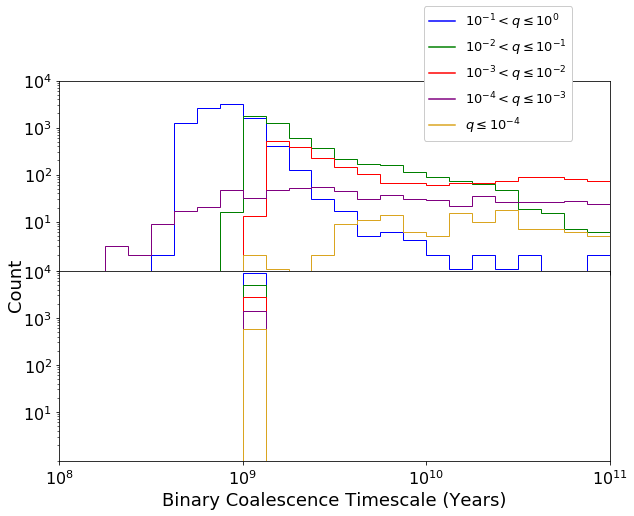

In [17]:
data = np.genfromtxt('simulation_input_data.txt', names=True)

evolution_classes = [[EvolveFDFA, {'m1':'mass_new_prev_in', 'm2':'mass_new_prev_out', 
                    'z':'redshift', 'separation':'separation', 'gamma':'gamma', 
                    'vel_disp_1':'vel_disp_prev_in',  'vel_disp_2':'vel_disp_prev_out'}, 'FDFA'],
                    [ConstantTime, {'z':'redshift'}, 'Constant']]

q = mass_ratio_func(data['mass_new_prev_in'], data['mass_new_prev_out'])

inds_set = []
for i in np.arange(1,5):
    inds_set.append(np.where((q<=10.0**-(i-1)) & (q>10.0**-(i)))[0])

inds_set.append(np.where((q<10.0**-(4)))[0])
                     
fig, ax = plt.subplots(nrows=len(evolution_classes), ncols=1, sharex=True, sharey=True)
ax = ax.ravel()
#ax = [ax]

fig.set_size_inches(9,7)
xlims = [[8.,11.]]
colors = ['blue', 'green', 'red', 'purple', 'goldenrod']

w = 0
bins = np.linspace(xlims[w][0], xlims[w][1], 25)
for evolve_class, evolve_dict, label in evolution_classes:
    evolve_kwargs = {key:data[evolve_dict[key]] for key in evolve_dict.keys()}
    evolve = evolve_class(**evolve_kwargs)
    evolve.evolve()
    ww = 0
    for inds in inds_set:
        ax[w].hist(np.log10(evolve.t_delay[inds]), bins=bins, histtype = 'step', log=True, color = colors[ww])
        ww+=1

    ax[w].set_ylim(9e-1, 1e4)
    ax[w].set_xlim(xlims[0])
    w+=1



#legend
ax[0].plot([-100,-100], [-220, 200], color = colors[0], label = r'$10^{-1}<q\leq 10^0$')
ax[0].plot([-100,-100], [-220, 200], color = colors[1], label = r'$10^{-2}<q\leq 10^{-1}$')
ax[0].plot([-100,-100], [-220, 200], color = colors[2], label = r'$10^{-3}<q\leq 10^{-2}$')
ax[0].plot([-100,-100], [-220, 200], color = colors[3], label = r'$10^{-4}< q\leq 10^{-3}$')
ax[0].plot([-100,-100], [-220, 200], color = colors[4], label = r'$q\leq 10^{-4}$')

#ax[0].legend(bbox_to_anchor=(3.0, 0.05), prop={'size':11})
legend = ax[0].legend(bbox_to_anchor=(0.65, 0.65), ncol=1, prop={'size':13}, fancybox=True, framealpha=1.0)
#labels
ax[-1].set_xlabel('Binary Coalescence Timescale (Years)', fontsize=18)
fig.text(0.02, 0.5, "Count", rotation='vertical', fontsize=18)

ax0_xticks = [8.0, 9., 10., 11.]
yticks = np.linspace(1.0,4.0, 4)
tickfontsize = 16
for w in range(len(evolution_classes)):
    ax[w].set_xticks(ax0_xticks)
    ax[w].set_xticklabels([r'$10^{%i}$'%int(i) for i in ax0_xticks], fontsize=tickfontsize)
    ax[w].set_yticks(10**yticks)
    ax[w].set_yticklabels([r'$10^{%i}$'%int(i) for i in yticks], fontsize=tickfontsize)

plt.subplots_adjust(left = 0.1, right=0.95, hspace=0.0, wspace = 0.3)
fig.savefig('figures/merger_timescales.pdf', dpi=300)

### Choice 2

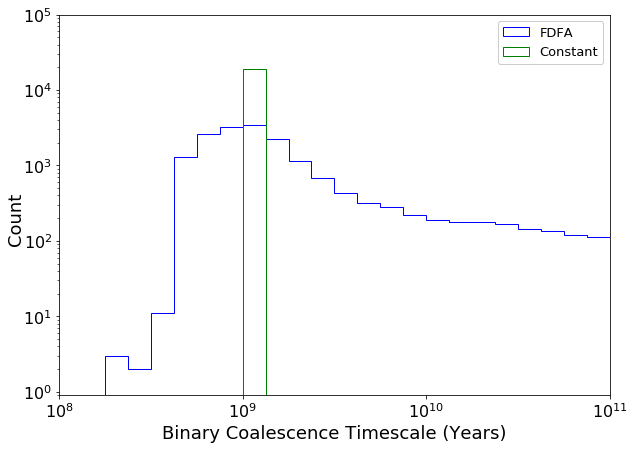

In [4]:
data = np.genfromtxt('simulation_input_data.txt', names=True)

evolution_classes = [[EvolveFDFA, {'m1':'mass_new_prev_in', 'm2':'mass_new_prev_out', 
                    'z':'redshift', 'separation':'separation', 'gamma':'gamma', 
                    'vel_disp_1':'vel_disp_prev_in',  'vel_disp_2':'vel_disp_prev_out'}, 'FDFA'], 
                     [ConstantTime, {'z':'redshift'}, 'Constant']]


fig, ax = plt.subplots(nrows=1, ncols=1)

fig.set_size_inches(9,7)
xlims = [[8.,11.]]
colors = ['blue', 'green', 'red', 'purple', 'goldenrod']
bins = np.linspace(xlims[0][0], xlims[0][1], 25)
w = 0
for evolve_class, evolve_dict, label in evolution_classes:
    evolve_kwargs = {key:data[evolve_dict[key]] for key in evolve_dict.keys()}
    evolve = evolve_class(**evolve_kwargs)
    evolve.evolve()
    ax.hist(np.log10(evolve.t_delay), bins=bins, histtype = 'step', log=True, color = colors[w], label=label)
    
    w+=1

#ax[0].legend(bbox_to_anchor=(3.0, 0.05), prop={'size':11})
legend = ax.legend(loc='upper right', prop={'size':13}, fancybox=True, framealpha=1.0)
#labels
ax.set_xlabel('Binary Coalescence Timescale (Years)', fontsize=18)
fig.text(0.02, 0.5, "Count", rotation='vertical', fontsize=18)

ax.set_ylim(9e-1, 1e4)
ax.set_xlim(xlims[0])
ax0_xticks = [8.0, 9., 10., 11.]
yticks = np.linspace(0.0,5.0, 6)
tickfontsize = 16
for w in range(len(evolution_classes)):
    ax.set_xticks(ax0_xticks)
    ax.set_xticklabels([r'$10^{%i}$'%int(i) for i in ax0_xticks], fontsize=tickfontsize)
    ax.set_yticks(10**yticks)
    ax.set_yticklabels([r'$10^{%i}$'%int(i) for i in yticks], fontsize=tickfontsize)

plt.subplots_adjust(left = 0.1, right=0.95, hspace=0.4, wspace = 0.3)
fig.savefig('figures/merger_timescales_2.pdf', dpi=300)